<a href="https://colab.research.google.com/github/Eason0227/Eason0227/blob/main/house_prices2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
house_price = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/train.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### feature engeering

In [140]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [142]:
#找出各個欄位遺失值的比例
missing_percent = house_price.isnull().sum()/len(house_price)
missing_percent.sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [143]:
house_price['PoolQC'] = house_price['PoolQC'].fillna('None')
house_price['MiscFeature'] = house_price['MiscFeature'].fillna('None')
house_price['Alley'] = house_price['Alley'].fillna('None')
house_price['Fence'] = house_price['Fence'].fillna('None')
house_price['FireplaceQu'] = house_price['FireplaceQu'].fillna('None')

In [144]:
house_price['MSSubClass'] = house_price['MSSubClass'].apply(str) # The building class
house_price['MoSold'] = house_price['MoSold'].apply(str) # Month Sold
house_price['YrSold'] = house_price['YrSold'].apply(str) # Year Sold
house_price['OverallCond'] = house_price['OverallCond'].apply(str) #Overall condition rating

train_feature = house_price.drop(['SalePrice'],axis=1)
train_SalePrice = house_price['SalePrice']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


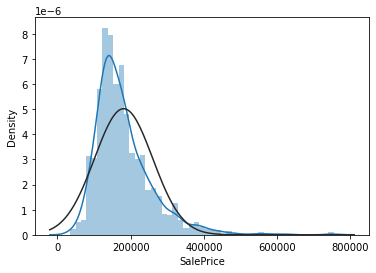

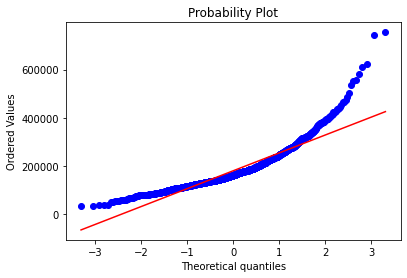

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
sns.distplot(train_SalePrice,fit = norm)
# QQ plot
fig = plt.figure()
res = stats.probplot(train_SalePrice,plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


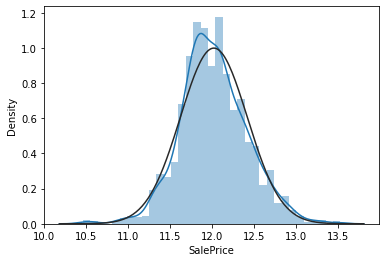

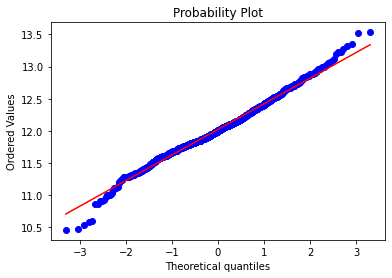

In [146]:
#applying log transformation
train_SalePrice = np.log(train_SalePrice)
sns.distplot(train_SalePrice,fit = norm)
## QQ plot
fig = plt.figure()
res = stats.probplot(train_SalePrice,plot=plt)

In [147]:
#將數值與類別的資料分開
numetric_col = train_feature.columns[ train_feature.dtypes != 'object' ]
category_col = train_feature.columns[ train_feature.dtypes == 'object' ]

train_numetric = train_feature[numetric_col]
train_category = train_feature[category_col]

In [148]:
#pip install fancyimpute

In [149]:
#數值資料使用KNN補值
from fancyimpute import KNN
from sklearn import preprocessing

KNN = KNN(k=5)
KNN_impute = KNN.fit_transform(train_numetric)

#數值資料標準化
z_scaler = preprocessing.StandardScaler()
train_numetric_knn = z_scaler.fit_transform(KNN_impute)
train_numetric_knn = pd.DataFrame(train_numetric_knn)
train_numetric_knn.columns = [numetric_col]
train_numetric_knn

#加入Id
train_numetric_knn['Id'] = house_price['Id']

Imputing row 1/1460 with 0 missing, elapsed time: 0.655
Imputing row 101/1460 with 1 missing, elapsed time: 0.659
Imputing row 201/1460 with 0 missing, elapsed time: 0.662
Imputing row 301/1460 with 0 missing, elapsed time: 0.663
Imputing row 401/1460 with 0 missing, elapsed time: 0.665
Imputing row 501/1460 with 0 missing, elapsed time: 0.667
Imputing row 601/1460 with 0 missing, elapsed time: 0.668
Imputing row 701/1460 with 0 missing, elapsed time: 0.670
Imputing row 801/1460 with 0 missing, elapsed time: 0.672
Imputing row 901/1460 with 1 missing, elapsed time: 0.674
Imputing row 1001/1460 with 0 missing, elapsed time: 0.675
Imputing row 1101/1460 with 0 missing, elapsed time: 0.677
Imputing row 1201/1460 with 0 missing, elapsed time: 0.679
Imputing row 1301/1460 with 1 missing, elapsed time: 0.681
Imputing row 1401/1460 with 0 missing, elapsed time: 0.683


#檢查異常值
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=42)
clf.fit(train_numetric_knn)
y_pred_train = clf.predict(train_numetric_knn)
scores_pred = clf.decision_function(train_numetric_knn)
np.sum(scores_pred > 0.2)

#用於連續的回響變數不滿足常態分配的情況。Box-Cox變換之後，可以一定程度上減小不可觀測的誤差和預測變數的相關性
from scipy.stats import skew
skewed = train_numetric_knn.apply(lambda x : skew(x))
skewed.sort_values(ascending=False).head(10)

#Box-Cox變換
from scipy.special import boxcox1p
skewness = skewed[abs(skewed)>0.75]
skewed_feature = skewness.index
for i in skewed_feature:
  train_numetric_knn[i] = boxcox1p(train_numetric_knn[i],0.15)
  
skewed1 = train_numetric_knn.apply(lambda x : skew(x))
skewed1.sort_values(ascending=False).head(10)


In [150]:
train_numetric_knn

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,-0.246069,-0.207142,0.651479,1.050994,0.878668,0.507335,0.575425,-0.288653,-0.944591,...,1.034295,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1,2,0.381094,-0.091886,-0.071836,0.156734,-0.429577,-0.575510,1.171992,-0.288653,-0.641228,...,-0.066121,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
2,3,-0.120636,0.073480,0.651479,0.984752,0.830215,0.319494,0.092907,-0.288653,-0.301643,...,0.952783,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,4,-0.455123,-0.096897,0.651479,-1.863632,-0.720298,-0.575510,-0.499274,-0.288653,-0.061670,...,0.830514,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688
4,5,0.548337,0.375148,1.374795,0.951632,0.733308,1.358141,0.463568,-0.288653,-0.174865,...,0.912026,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.371501,-0.260560,-0.071836,0.918511,0.733308,-0.575510,-0.973018,-0.288653,0.873321,...,0.871270,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1456,1457,0.590148,0.266407,-0.071836,0.222975,0.151865,0.081932,0.759659,0.722112,0.049262,...,0.015392,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1457,1458,-0.204258,-0.147810,0.651479,-1.002492,1.024029,-0.575510,-0.369871,-0.288653,0.701265,...,-1.492585,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112
1458,1459,-0.120636,-0.080160,-0.795151,-0.704406,0.539493,-0.575510,-0.865548,6.092188,-1.284176,...,-1.125780,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688


In [151]:
#類別資料使用眾數補值
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
transformed_values=imputer.fit_transform(train_category)
train_category_mode = pd.DataFrame(transformed_values)
train_category_mode.columns = [category_col]

In [152]:
from sklearn.preprocessing import LabelEncoder

#有順序之分的資料(品質、等級)採用label encoding
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#label encoding
la = preprocessing.LabelEncoder()
for i in cols:
  train_category_mode[i] = la.fit_transform(train_category_mode[i])

#加入id
train_category_mode['Id'] = house_price['Id']

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
train_data

,"(Id,)","(LotFrontage,)","(LotArea,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(BsmtFinSF2,)","(BsmtUnfSF,)",...,"('SaleType',)_ConLw","('SaleType',)_New","('SaleType',)_Oth","('SaleType',)_WD","('SaleCondition',)_Abnorml","('SaleCondition',)_AdjLand","('SaleCondition',)_Alloca","('SaleCondition',)_Family","('SaleCondition',)_Normal","('SaleCondition',)_Partial"
0,1,-0.246069,-0.207142,0.651479,1.050994,0.878668,0.507335,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,2,0.381094,-0.091886,-0.071836,0.156734,-0.429577,-0.575510,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,3,-0.120636,0.073480,0.651479,0.984752,0.830215,0.319494,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.455123,-0.096897,0.651479,-1.863632,-0.720298,-0.575510,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,5,0.548337,0.375148,1.374795,0.951632,0.733308,1.358141,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.371501,-0.260560,-0.071836,0.918511,0.733308,-0.575510,-0.973018,-0.288653,0.873321,...,0,0,0,1,0,0,0,0,1,0
1456,1457,0.590148,0.266407,-0.071836,0.222975,0.151865,0.081932,0.759659,0.722112,0.049262,...,0,0,0,1,0,0,0,0,1,0
1457,1458,-0.204258,-0.147810,0.651479,-1.002492,1.024029,-0.575510,-0.369871,-0.288653,0.701265,...,0,0,0,1,0,0,0,0,1,0
1458,1459,-0.120636,-0.080160,-0.795151,-0.704406,0.539493,-0.575510,-0.865548,6.092188,-1.284176,...,0,0,0,1,0,0,0,0,1,0


In [158]:
#merge the category data and numertric data
train_data = pd.merge(train_numetric_knn,train_category_mode)
train_data = train_data.drop(['Id'],axis = 1)
#無順序之分的資料(MSZoning、Neighborhood)採用one hot encoding，且get_dummies只處理字串資料
train_data = pd.get_dummies(train_data)
train_data['SalePrice'] = train_SalePrice

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [160]:
train_data['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# test data

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/test.csv')
submission['PoolQC'] = submission['PoolQC'].fillna('None')
submission['MiscFeature'] = submission['MiscFeature'].fillna('None')
submission['Alley'] = submission['Alley'].fillna('None')
submission['Fence'] = submission['Fence'].fillna('None')
submission['FireplaceQu'] = submission['FireplaceQu'].fillna('None')

submission['MSSubClass'] = submission['MSSubClass'].apply(str) # The building class
submission['MoSold'] = submission['MoSold'].apply(str) # Month Sold
submission['YrSold'] = submission['YrSold'].apply(str) # Year Sold
submission['OverallCond'] = submission['OverallCond'].apply(str) #Overall condition rating

In [ ]:
#submission = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/test.csv')
#submission = submission.drop(['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1)

#數值與類別的資料分開來補值
numetric_col = submission.columns[ submission.dtypes != 'object' ]
category_col = submission.columns[ submission.dtypes == 'object' ]

submission_numetric = submission[numetric_col]
submission_category = submission[category_col]

#數值資料使用KNN補值
from fancyimpute import KNN
KNN_impute = KNN(k=5).fit_transform(submission_numetric)
#數值資料正規化
z_scaler = preprocessing.StandardScaler()
train_numetric_knn = z_scaler.fit_transform(KNN_impute)

submission_numetric_knn = pd.DataFrame(train_numetric_knn)
submission_numetric_knn.columns = [numetric_col]
submission_numetric_knn['Id'] = range(len(submission_numetric_knn))

#數值資料使用眾數補值
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformed_values=imputer.fit_transform(submission_category)
submission_category_mode = pd.DataFrame(transformed_values)
submission_category_mode.columns = [category_col]

#轉為單熱變數
la = preprocessing.LabelEncoder()
for i in category_col:
  submission_category_mode[i] = la.fit_transform(submission_category_mode[i])

#加入id
submission_category_mode['Id'] = range(len(submission_category_mode))

submission = pd.merge(submission_numetric_knn,submission_category_mode)
submission = submission.drop(['Id'],axis = 1)

In [161]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['SalePrice'],axis=1)
y = train_SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=152)

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=123)

def RMSE(prediction,y):
  return np.sqrt(mean_squared_error(prediction, y))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train , y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse

In [132]:
y_train

953    12.055250
135    12.066811
320    12.744444
302    12.230765
167    12.693499
         ...    
572    12.321631
326    12.688499
395    11.767568
199    12.524163
732    12.312682
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import warnings
#warnings.filterwarnings('ignore')


classifiers = []
classifiers.append(LinearRegression())
classifiers.append(RandomForestRegressor(n_estimators = 300, random_state = 40))
#classifiers.append(SVR(kernel='linear',gamma='auto') )
classifiers.append(xgb.XGBRegressor(objective='reg:squarederror',n_estimators=300))
classifiers.append(KNeighborsRegressor(n_neighbors=3))
classifiers.append(ExtraTreesRegressor(n_estimators=300))
classifiers.append(GradientBoostingRegressor(n_estimators=300))
classifiers.append(lgb.LGBMRegressor(objective='regression',n_estimators=300))

cv_results = []
for classifier in classifiers:
  print(classifier)
  cv_results.append(cv_rmse(classifier))

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({ 'Algorithm': ['LinearRegression','Random Forest','XGBoost','KNN',
                      'Extra Tree','Gradient Boosting','lightGBM'],
              'Cross Validation Mean': cv_mean,
              'Cross Validation Std': cv_std})
cv_res

LinearRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

RandomForestRegressor(n_estimators=300, random_state=40)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

XGBRegressor(n_estimators=300, objective='reg:squarederror')
KNeighborsRegressor(n_neighbors=3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

ExtraTreesRegressor(n_estimators=300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

GradientBoostingRegressor(n_estimators=300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


# XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False)

random_grid = { 
    'max_depth': [5,7,9],
    'learning_rate': [0.2,0.5,0.7],
    'n_estimators': [200,300],
    'colsample_bytree': [0.5, 0.3 ,0.1]
}

XGB = XGBRegressor(objective='reg:squarederror')
grid_search_XGB = GridSearchCV(XGB , random_grid, cv= kfolds ,scoring= mse)
grid_search_XGB.fit(X_train,y_train)

best_XGB_estimator = grid_search_XGB.best_estimator_
print(best_XGB_estimator)

In [ ]:
# XGB = best_XGB_estimator
from xgboost import XGBRegressor
XGB = XGBRegressor(colsample_bytree=0.3, learning_rate=0.5, max_depth=9,n_estimators=100, objective='reg:squarederror')
XGB.fit(X_train,y_train)
XGB_predictions_test = XGB.predict(X_test)

# Data back up by appling exponential transformation
#XGB_predictions_test = np.exp(XGB_predictions_test)
#test_y = np.exp(y_test)

RMSE(XGB_predictions_test,y_test)

In [ ]:
# Extra Trees
ET = ExtraTreesRegressor(n_estimators=300)
ET.fit(X_train,y_train)
ET_predictions_test = ET.predict(X_test)

#ET_predictions_test = np.exp(ET_predictions_test)
RMSE(ET_predictions_test,y_test)

In [ ]:
#GradientBoosting
GB = GradientBoostingRegressor(learning_rate=0.5, max_depth=9,n_estimators=300)
GB.fit(X_train,y_train)
GB_predictions_test = GB.predict(X_test)
#GB_predictions_test = np.exp(GB_predictions_test)
RMSE(GB_predictions_test,y_test)

In [ ]:
# Mix
mix_predict = XGB_predictions_test * 0.5 + ET_predictions_test*0.3 + GB_predictions_test*0.2
RMSE(mix_predict,y_test)

In [ ]:
submission_xgb = XGB.predict(submission)
submission_GB = GB.predict(submission) 
submission_ET = ET.predict(submission) 
submission_mix_predict = submission_xgb * 0.5 + submission_ET*0.3 + submission_GB*0.2

sample_submission = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission['SalePrice'] = submission_xgb
sample_submission

In [ ]:
sample_submission.to_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/XGB_result4.csv')